In [ ]:
# DESCRIPTIVE STATISTICS:    -describe()    -value_counts()    -boxplot    -scatter
 
# GROUP-BY:   -groupby    -pivot    -pcolor (HeatMap)

# CORRELATION:    -regplot

# CORRELATION ADVANCED:    -pearsonr

# ANOVA:    -f_oneway


In [1]:
# Importing Data Frames


import pandas

aust=pandas.read_excel('\\Users\luisr\Data_frames\\australia.xlsx')
timeuse=pandas.read_csv('\\Users\luisr\Data_Frames\\timeuse.csv')
cod=pandas.read_csv('\\Users\luisr\Data_Frames\\causesofdeath_france.csv')




In [2]:
# Data preparation #1


import numpy

# taking out from column 'Values' spaces and ':' chars. Then convert column to float.
cod['Value'] = numpy.array([num.replace(' ', '') for num in cod['Value']])
cod.replace(':', 0, inplace=True)
cod['Value']=cod['Value'].astype('float')



In [25]:
# Data preparation #2


# Extracting categories 'Neoplasms', 'Malignant neoplasms (C00-C97)', 'Diseases of the circulatory system (I00-I99)'.
cod_vals = cod[['ICD10', 'Value']].copy()

neoplas = cod_vals[cod_vals['ICD10'] == 'Neoplasms'].copy()
mal_neoplas = cod_vals[cod_vals['ICD10'] == 'Malignant neoplasms (C00-C97)'].copy()
circ_sys = cod_vals[cod_vals['ICD10'] == 'Diseases of the circulatory system (I00-I99)'].copy()



In [29]:
# Testing space




In [ ]:


##############    DESCRIPTIVE STATISTICS    ##############



In [37]:
# -decribe()


#aust.describe()
#timeuse.describe()
#cod.describe(include = 'all')



In [26]:
# -value_counts()  (CATEGORICAL DATA)


countries_count=timeuse['GEO/ACL00'].value_counts().to_frame()


countries_count.rename(columns={'GEO/ACL00' : 'Count'}, inplace=True)

#countries_count


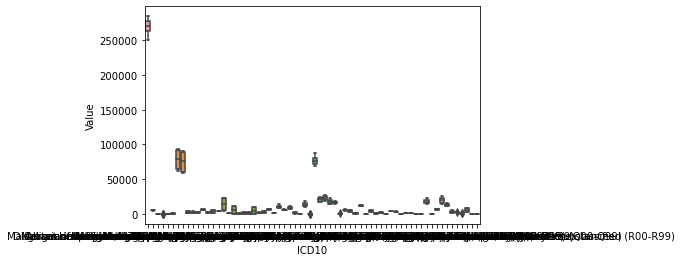

In [3]:
# -boxplot


import seaborn

seaborn.boxplot(x='ICD10', y='Value', data=cod)




In [11]:
# -scatter


import matplotlib.pyplot as plt

#plt.scatter(x = aust['smoke'], y = aust['unemp'])






In [ ]:


#################   GROUP-BY   ##################



In [28]:
# -Group-By 


import matplotlib.pyplot as plt

# Grouping
groups = cod[['SEX', 'ICD10', 'Value']].copy()
groupped = groups.groupby(['SEX', 'ICD10'], as_index = False).mean()

# Pivot (Transversing)
pivot = groupped.pivot(index = 'SEX', columns = 'ICD10')

# HeatMap
#plt.pcolor(pivot, cmap='RdBu')
#plt.colorbar


In [ ]:


#############   CORRELATION   #############



In [31]:
# regplot


import seaborn

#seaborn.regplot(x = 'unemp', y='premort', data=aust)

In [ ]:


##############   PEARSON CORRELATION   #############



In [26]:
# _pearsonr


import scipy.stats

coef,p_value = scipy.stats.pearsonr(neoplas['Value'], mal_neoplas['Value'])
print(coef, p_value)


# Strong correlation if pearson_coef close to one and p-value close to 0.

0.9999866926892081 1.9813182432506584e-33


In [ ]:


################    ANOVA    ################



In [28]:
# -f_oneway


import scipy.stats

# test1
grp=cod[['ICD10', 'Value']].copy()

groupped = grp.groupby(['ICD10'])

anova1 = scipy.stats.f_oneway(groupped.get_group('Neoplasms')['Value'], groupped.get_group('Malignant neoplasms (C00-C97)')['Value'])


# test2
anova2 = scipy.stats.f_oneway(neoplas['Value'], mal_neoplas['Value'])


#anova1
#anova2



# Values for different categories are similar if the f_score is large and p-value is low. 

# Strong correlation between categorical and other variables,
# if f_score is high, and p-value is low.

